In [1]:
import pandas as pd
import os

# List files in the current working directory to help debug file path issues
print("Files in current directory:", os.listdir())

# Define the correct path to the data folder
data_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'customer_data.csv')

# Try reading the CSV file, handle error if not found
try:
    df = pd.read_csv(data_path)
    print("\nFirst few rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {data_path}")


Files in current directory: ['datasegmentation.ipynb']

First few rows of the dataset:
   CustomerID  Age  Annual Income  Spending Score
0           1   19          15000              39
1           2   21          16000              81
2           3   20          17000               6
3           4   23          18000              77
4           5   31          19000              40


In [2]:
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = df[['Age', 'Annual Income', 'Spending Score']]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


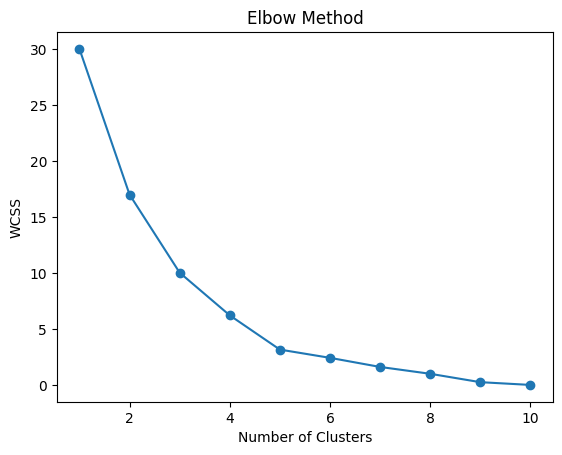

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [5]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Try fewer clusters since data is small
for k in range(2, 6):  # max k=5 to avoid too many small clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f'Silhouette Score for {k} clusters: {score:.3f}')


Silhouette Score for 2 clusters: 0.359
Silhouette Score for 3 clusters: 0.265
Silhouette Score for 4 clusters: 0.242
Silhouette Score for 5 clusters: 0.300


In [6]:
# Assume optimal clusters = 5 from elbow method
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


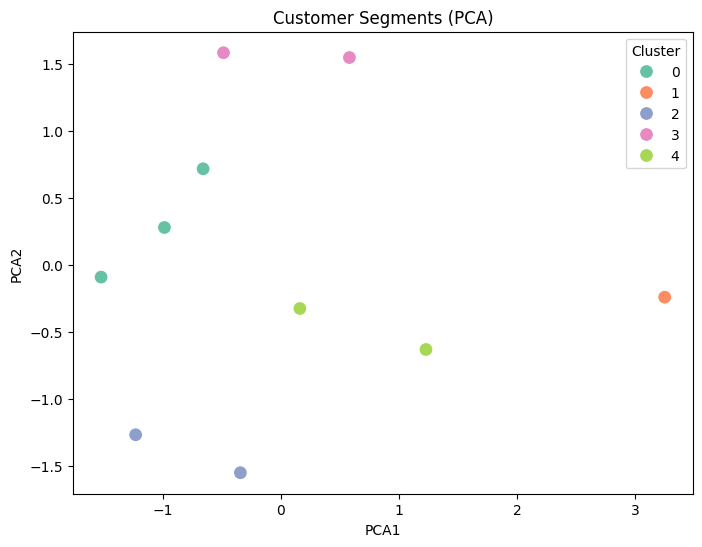

In [7]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

df['PCA1'] = reduced_features[:, 0]
df['PCA2'] = reduced_features[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (PCA)')
plt.show()


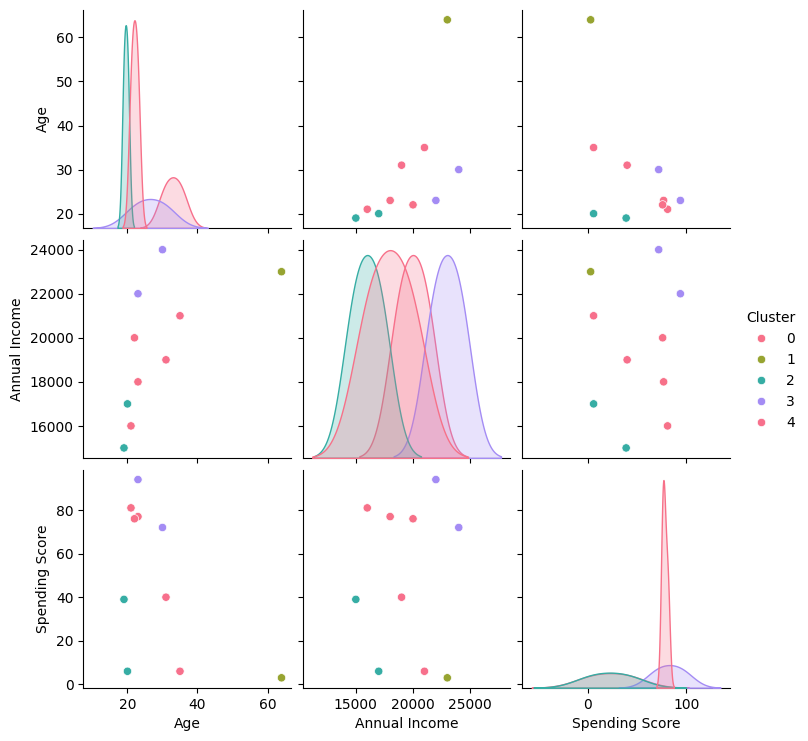

In [8]:
sns.pairplot(df[['Age', 'Annual Income', 'Spending Score', 'Cluster']], hue='Cluster', palette='husl')
plt.show()


1. **High-Income, High-Spending Cluster**:
   - Loyal customers for premium products.
   - Consider offering exclusive benefits or memberships.

2. **Low-Income, High-Spending Cluster**:
   - Target with affordable product options or offers.

3. **Young Age Group with Moderate Income**:
   - Attract via tech-based or trendy products.

4. **Older, Low-Spending Group**:
   - Use trust and service assurance in marketing.

5. **Middle-Age, Average Spend Group**:
   - Encourage more frequent purchases through rewards.


In [9]:
output_path = os.path.join(os.path.dirname(os.getcwd()), 'outputs', 'clustered_data.csv')
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False)
